## Finding weat score in pre trained fasttext models

In [1]:
pip install git+https://github.com/dccuchile/wefe.git

  Cloning https://github.com/dccuchile/wefe.git to /private/var/folders/01/75h4kx1s6mdbs13q9d9n9r780000gn/T/pip-req-build-141qyx28
  Running command git clone --filter=blob:none --quiet https://github.com/dccuchile/wefe.git /private/var/folders/01/75h4kx1s6mdbs13q9d9n9r780000gn/T/pip-req-build-141qyx28
  Resolved https://github.com/dccuchile/wefe.git to commit a50c6c9334177cf49480fa8a88f409540e5adc24
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wefe

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wefe.word_embedding_model import WordEmbeddingModel
import gensim.downloader as api
from wefe.query import Query
from wefe.metrics.WEAT import WEAT
from wefe.datasets.datasets import load_weat
from gensim.models.fasttext import load_facebook_vectors

modelL = 'leftL_modelP.bin' # path to our FastText model for liberal words
modelR = 'rightC_modelP.bin' # path to our FastText model for conservative words

liberal_wv = load_facebook_vectors(modelL)
conservative_wv = load_facebook_vectors(modelR)

liberal_model = WordEmbeddingModel(liberal_wv, 'fasttext')
conservative_model = WordEmbeddingModel(conservative_wv, 'fasttext')


In [4]:
word_sets= load_weat()

In [5]:
weat = WEAT()

In [6]:
def calc_weat_score(grp, terms, l1, l2, model):
    
    ## test the bias on grp1 vs grp2 on terms
    ## (+) means grp1 more towards terms then grp2, otherwise (-)
    
    query = Query(grp,
              terms,
              l1,
              l2)
    
    result = weat.run_query(query,
                            model,
                            warn_not_found_words=False,
                            aggregate_results=True,
                            return_only_aggregation=True)
    
    return result

In [7]:
word_sets = {}
word_sets['male_terms'] = ['male', 'man', 'boy', 'brother', 'he', 'him', 'his', 'son']
word_sets['female_terms'] = ['female', 'woman', 'girl', 'sister', 'she', 'her', 'hers', 'daughter']

word_sets['islam_terms'] = ['islam', 'muslim', 'allah', 'muhammad', 'hijab', 'quran', 'ramadan', 'mecca']
word_sets['christianity_terms'] = ['christian', 'jesus', 'bible', 'church', 'god', 'prayer', 'angel', 'saint']

word_sets['black_terms'] = ['african', 'black', 'ethopian', 'nigerian', 'ghanaian', 'jamaican', 'haitian', 'somali', 'kenyan', 'south african']

word_sets['white_terms'] = ['caucasian', 'white', 'european', 'anglo', 'english', 'irish', 'scottish', 'welsh', 'french', 'german', 'italian', 'spanish', 'swedish']

word_sets['asian_terms'] = ['asian', 'chinese', 'japanese', 'korean', 'vietnamese', 'thai', 'filipino', 'indian', 'pakistani', 'sri lankan', 'bangladeshi', 'indonesian']

word_sets['hispanic_terms'] = ['hispanic', 'latino', 'mexican', 'puerto rican', 'cuban', 'dominican', 'salvadoran', 'guatemalan', 'colombian', 'peruvian']

word_sets['lgbtq_terms'] = ['lesbian', 'gay', 'bisexual', 'queer', 'trans', 'transgender', 'homosexual', 'pansexual', 'asexual']
word_sets['straight_terms'] = ['cis', 'straight', 'heterosexual', 'cisgender']

word_sets['rich_terms'] = ['rich', 'wealthy', 'loaded', 'money', 'flush', 'moneyed', 'monied', 'opulent', 'luxury']
word_sets['poor_terms'] = ['poor', 'impoverished', 'poverty', 'homeless', 'broke', 'beggared', 'beggarly', 'needy']

word_sets['old_terms'] = ['old', 'aged', 'elderly', 'senior']
word_sets['young_terms'] = ['young', 'youthful']

In [9]:
# Groups

# Gender
gender_group = ([word_sets['male_terms'], word_sets['female_terms']], ["Male", "Female"])

# Religion
religion_group = ([word_sets['islam_terms'], word_sets['christianity_terms']], ["Islam", "Christianity"])

# Race
white_black_group = ([word_sets['white_terms'], word_sets['black_terms']], ["White", "Black"])
white_asian_group = ([word_sets['white_terms'], word_sets['asian_terms']], ["White", "Asian"])
white_hispanic_group = ([word_sets['white_terms'], word_sets['hispanic_terms']], ["White", "Hispanic"])
black_asian_group = ([word_sets['black_terms'], word_sets['asian_terms']], ["Black", "Asian"])
black_hispanic_group = ([word_sets['black_terms'], word_sets['hispanic_terms']], ["Black", "Hispanic"])

# Gender Identity and sexual orientation
lgbtq_straight_group = ([word_sets['lgbtq_terms'], word_sets['straight_terms']], ["LGBTQ", "Straight"])


# Age
old_young_group = ([word_sets['old_terms'], word_sets['young_terms']], ["Old", "Young"])

# All the groups
groups = [gender_group,
          religion_group,
          white_black_group,
          white_asian_group,
          white_hispanic_group,
          black_asian_group,
          black_hispanic_group,
          lgbtq_straight_group,
          #rich_poor_group,
          old_young_group]
#groups = [lgbtq_straight_group]

In [10]:
# Import metric words
word_sets['strong_terms'] = ['power', 'strong', 'confident', 'dominant', 'potent', 'command', 'assert', 
                             'loud', 'bold', 'succeed', 'triumph', 'leader', 'shout', 'dynamic', 'winner']
word_sets['weak_terms'] = ['weak', 'surrender', 'timid', 'vulnerable', 'weakness', 'wispy', 'withdraw', 
                           'yield', 'failure', 'shy', 'follow', 'lose', 'fragile', 'afraid', 'loser']


word_sets['normal_terms'] = ['correct', 'correctness', 'legitimate', 'logical', 'valid', 'legal',
                             'normal', 'natural', 'justified', 'good', 'rightful', 'right', 'accepted']
word_sets['abnormal_terms'] = ['bad', 'wrong', 'deficient', 'dissatisfactory', 'disgusting', 'lame',
                               'lousy', 'unacceptable', 'unsatisfactory', 'illegal', 'weird', 'abnormal']

word_sets['intelligence_terms'] = ['precocious', 'resourceful', 'inquisitive', 'genius', 'inventive', 
                                   'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 
                                   'inquiring', 'judicious', 'analytical', 'apt', 'venerable', 'imaginative',
                                   'shrewd', 'thoughtful', 'wise', 'smart', 'ingenious', 'clever', 'brilliant', 
                                   'logical', 'intelligent']
word_sets['appearance_terms'] = ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual',
                                 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly',
                                 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 
                                 'fat','weak', 'thin', 'pretty', 'beautiful', 'strong']

In [11]:
# Metrics Used

strong_weak_metric = ([word_sets['strong_terms'], word_sets['weak_terms']], ["Strong", "Weak"])


normal_abnormal_metric = ([word_sets['normal_terms'], word_sets['abnormal_terms']], ["Normal", "Abnormal"])

intelligence_appearance_metric = ([word_sets['intelligence_terms'], word_sets['appearance_terms']], ["Intelligence", "Appearance"])

In [18]:
import math
import matplotlib.pyplot as plt
def run_on_all_groups(groups, metrics, title):
        
    fig = plt.figure()
    ax = plt.axes()
    
    i = 0.75
    
    for g in groups:
        res = calc_weat_score(g[0], metrics[0], g[1], metrics[1], liberal_model)
        print("L:", res["query_name"], ":", res["result"])
        ax.bar(i + 0, res["result"], color='b', width= 0.5)

        res = calc_weat_score(g[0], metrics[0], g[1], metrics[1], conservative_model)
        print("C:", res["query_name"], ":", res["result"])
        ax.bar(i + 0.5, res["result"], color='r', width= 0.5)
        
        print()
        i = i + 2

    labels = ['Male,Female', 
              'Islam,Christianity', 
              'White,Black',
              'White,Asian',
              'White,Hispanic',
              'Black,Asian',
              'Black,Hispanic',
              'LGBTQ,Straight',
              'Old,Young']
    
    X = range(0,math.floor(i),2)
    #X = range(len(labels))
    ax.set_xticks(X)
    ax.set_xticklabels(labels, rotation=45)

    plt.title(title)

    
    print("--")
    print()


ERROR:root:At least one set of 'Islam and Christianity wrt Strong and Weak' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'Islam and Christianity wrt Strong and Weak' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Black wrt Strong and Weak' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Black wrt Strong and Weak' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Asian wrt Strong and Weak' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter

L: Male and Female wrt Strong and Weak : -0.03983272636930141
C: Male and Female wrt Strong and Weak : 0.028034489300279297

L: Islam and Christianity wrt Strong and Weak : nan
C: Islam and Christianity wrt Strong and Weak : nan

L: White and Black wrt Strong and Weak : nan
C: White and Black wrt Strong and Weak : nan

L: White and Asian wrt Strong and Weak : nan
C: White and Asian wrt Strong and Weak : nan

L: White and Hispanic wrt Strong and Weak : nan
C: White and Hispanic wrt Strong and Weak : nan

L: Black and Asian wrt Strong and Weak : nan
C: Black and Asian wrt Strong and Weak : nan

L: Black and Hispanic wrt Strong and Weak : nan
C: Black and Hispanic wrt Strong and Weak : nan

L: LGBTQ and Straight wrt Strong and Weak : 0.14273001315693062
C: LGBTQ and Straight wrt Strong and Weak : 0.12125220400769088

L: Old and Young wrt Strong and Weak : -0.24627605887750784
C: Old and Young wrt Strong and Weak : -0.13373677803292164

--



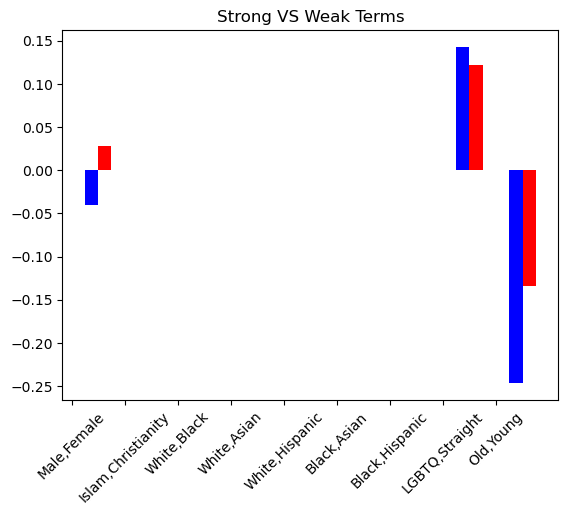

In [19]:
run_on_all_groups(groups, strong_weak_metric, 'Strong VS Weak Terms')

ERROR:root:At least one set of 'Islam and Christianity wrt Normal and Abnormal' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'Islam and Christianity wrt Normal and Abnormal' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Black wrt Normal and Abnormal' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Black wrt Normal and Abnormal' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Asian wrt Normal and Abnormal' query has proportionally fewer embeddings than allowed by the lost_vocabulary

L: Male and Female wrt Normal and Abnormal : 0.196609905966512
C: Male and Female wrt Normal and Abnormal : 0.29821518240691913

L: Islam and Christianity wrt Normal and Abnormal : nan
C: Islam and Christianity wrt Normal and Abnormal : nan

L: White and Black wrt Normal and Abnormal : nan
C: White and Black wrt Normal and Abnormal : nan

L: White and Asian wrt Normal and Abnormal : nan
C: White and Asian wrt Normal and Abnormal : nan

L: White and Hispanic wrt Normal and Abnormal : nan
C: White and Hispanic wrt Normal and Abnormal : nan

L: Black and Asian wrt Normal and Abnormal : nan
C: Black and Asian wrt Normal and Abnormal : nan

L: Black and Hispanic wrt Normal and Abnormal : nan
C: Black and Hispanic wrt Normal and Abnormal : nan

L: LGBTQ and Straight wrt Normal and Abnormal : 0.02022910266593614
C: LGBTQ and Straight wrt Normal and Abnormal : 0.28115413509882403

L: Old and Young wrt Normal and Abnormal : -0.06730978909905971
C: Old and Young wrt Normal and Abnormal : -0.0664

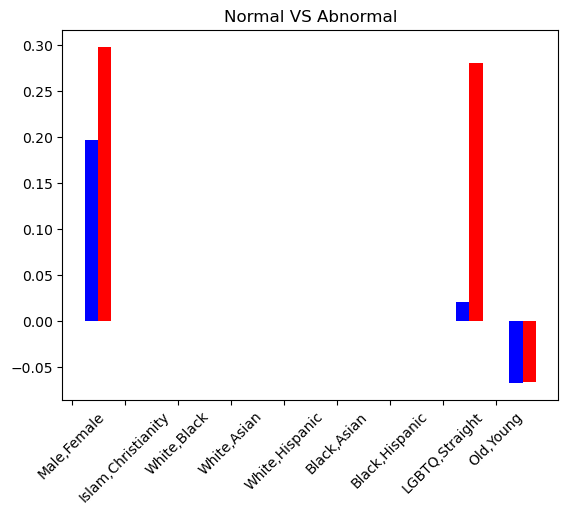

In [20]:
run_on_all_groups(groups, normal_abnormal_metric,'Normal VS Abnormal')

ERROR:root:At least one set of 'Islam and Christianity wrt Intelligence and Appearance' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'Islam and Christianity wrt Intelligence and Appearance' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Black wrt Intelligence and Appearance' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Black wrt Intelligence and Appearance' query has proportionally fewer embeddings than allowed by the lost_vocabulary_threshold parameter (0.2). This query will return np.nan.
ERROR:root:At least one set of 'White and Asian wrt Intelligence and Appearance' query has proportionally fewer embedd

L: Male and Female wrt Intelligence and Appearance : 0.2271663891491683
C: Male and Female wrt Intelligence and Appearance : 0.3811443556518551

L: Islam and Christianity wrt Intelligence and Appearance : nan
C: Islam and Christianity wrt Intelligence and Appearance : nan

L: White and Black wrt Intelligence and Appearance : nan
C: White and Black wrt Intelligence and Appearance : nan

L: White and Asian wrt Intelligence and Appearance : nan
C: White and Asian wrt Intelligence and Appearance : nan

L: White and Hispanic wrt Intelligence and Appearance : nan
C: White and Hispanic wrt Intelligence and Appearance : nan

L: Black and Asian wrt Intelligence and Appearance : nan
C: Black and Asian wrt Intelligence and Appearance : nan

L: Black and Hispanic wrt Intelligence and Appearance : nan
C: Black and Hispanic wrt Intelligence and Appearance : nan

L: LGBTQ and Straight wrt Intelligence and Appearance : 0.12409332889901561
C: LGBTQ and Straight wrt Intelligence and Appearance : 0.15459

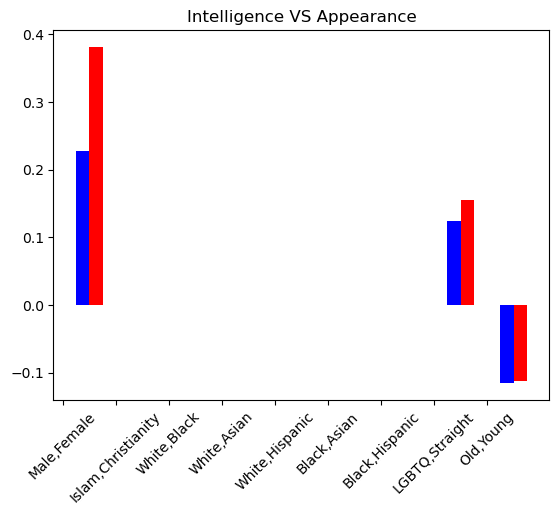

In [21]:
run_on_all_groups(groups, intelligence_appearance_metric, 'Intelligence VS Appearance')

Here We can observe that the scores were NaN (not a number) for both of our trained fastText Liberal and Conservative models. This can occur if the pair of word sets in the WEAT is not present in the trained vocabulary of the models. It is important to note that this can happen and is not a reflection of any issues with our models or methodology.